In [1]:
from phoenix.synthesis import ordering
from phoenix import Circuit, gates
import numpy as np
import networkx as nx

n = 5
m = 8
paulis = ['X', 'Y', 'Z']

n = 4
m = 6

In [2]:
g = gates.Clifford2QGate('Z', 'X')

In [3]:
def gene_rand_circ(n, m, seed=None):
    np.random.seed(seed)
    circ = Circuit()
    for _ in range(m):
        circ.append(g.on(np.random.choice(range(n), 2, replace=False).tolist()))


    circ = simp_circ_struct(circ)
    return circ

def simp_circ_struct(circ):
    c = Circuit()
    dependencies = set()
    for g in circ:
        if tuple(sorted(g.qregs)) not in dependencies:
            c.append(g)
            dependencies.add(tuple(sorted(g.qregs)))
    return c
    

In [4]:
c1 = Circuit([
    g.on([0, 3]), g.on([1,3]), g.on([0,1]), g.on([2,3])
])
c2 = Circuit([
    g.on([0,2]), g.on([0,3]), g.on([1,3]), g.on([2,3])
])
c3 = Circuit([
    g.on([0,1]), g.on([0,2]), g.on([1,2]), g.on([1,3]), 
])

In [5]:
# c1 = gene_rand_circ(n, m, 123)
# c1.append(g.on([0,1]))
# c2 = gene_rand_circ(n, m, 456)
# c3 = gene_rand_circ(n, m, 789)

     ┌──────┐        ┌──────┐
q_0: ┤0     ├────────┤0     ├
     │      │┌──────┐│  Czx │
q_1: ┤      ├┤0     ├┤1     ├
     │  Czx ││      │├──────┤
q_2: ┤      ├┤  Czx ├┤0     ├
     │      ││      ││  Czx │
q_3: ┤1     ├┤1     ├┤1     ├
     └──────┘└──────┘└──────┘


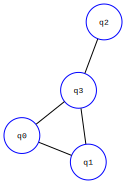

In [6]:
print(c1.to_qiskit().draw(fold=100))
c1.draw_qubit_dependency()

     ┌──────┐┌──────┐                
q_0: ┤0     ├┤0     ├────────────────
     │      ││      │┌──────┐        
q_1: ┤  Czx ├┤      ├┤0     ├────────
     │      ││  Czx ││      │┌──────┐
q_2: ┤1     ├┤      ├┤  Czx ├┤0     ├
     └──────┘│      ││      ││  Czx │
q_3: ────────┤1     ├┤1     ├┤1     ├
             └──────┘└──────┘└──────┘


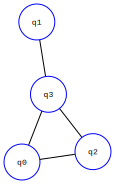

In [7]:
print(c2.to_qiskit().draw(fold=100))
c2.draw_qubit_dependency()


     ┌──────┐┌──────┐                
q_0: ┤0     ├┤0     ├────────────────
     │  Czx ││      │┌──────┐┌──────┐
q_1: ┤1     ├┤  Czx ├┤0     ├┤0     ├
     └──────┘│      ││  Czx ││      │
q_2: ────────┤1     ├┤1     ├┤  Czx ├
             └──────┘└──────┘│      │
q_3: ────────────────────────┤1     ├
                             └──────┘


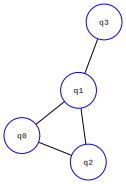

In [8]:
print(c3.to_qiskit().draw(fold=100))
c3.draw_qubit_dependency()

In [15]:
def sim1(a, b):
    a = a / np.linalg.norm(a)
    b = b / np.linalg.norm(b)
    return a @ b

def sim2(a, b):
    return 1 / np.linalg.norm(a - b)

def sim3(A, B):
    # Frobenius norm
    return 1 / (1 +np.linalg.norm(A - B))


In [14]:
np.linalg.norm(np.ones((2,3))) ** 2

5.999999999999999

In [10]:
D1 = nx.floyd_warshall_numpy(c1.qubit_dependency())
D2 = nx.floyd_warshall_numpy(c2.qubit_dependency())
D3 = nx.floyd_warshall_numpy(c3.qubit_dependency())

In [16]:
# distance 3
print('similarity between D1 and D2: ', sim3(D1, D2))
print('similarity between D1 and D3: ', sim3(D1, D3))
print('similarity between D2 and D3: ', sim3(D2, D3))

similarity between D1 and D2:  0.3333333333333333
similarity between D1 and D3:  0.2612038749637414
similarity between D2 and D3:  0.2612038749637414


In [ ]:
# distance 1
print('similarity between D1 and D2: ', np.mean([sim1(D1[:,_], D2[:,_]) for _ in range(n)]))
print('similarity between D1 and D3: ', np.mean([sim1(D1[:,_], D3[:,_]) for _ in range(n)]))
print('similarity between D2 and D3: ', np.mean([sim1(D2[:,_], D3[:,_]) for _ in range(n)]))

similarity between D1 and D2:  0.9346230055411737
similarity between D1 and D3:  0.8887223511231248
similarity between D2 and D3:  0.8977918909913549


In [11]:
# distance 2
print('similarity between D1 and D2: ', np.mean([sim2(D1[:,_], D2[:,_]) for _ in range(n)]))
print('similarity between D1 and D3: ', np.mean([sim2(D1[:,_], D3[:,_]) for _ in range(n)]))
print('similarity between D2 and D3: ', np.mean([sim2(D2[:,_], D3[:,_]) for _ in range(n)]))

similarity between D1 and D2:  inf
similarity between D1 and D3:  0.7478909578906802
similarity between D2 and D3:  0.7071067811865475


/var/folders/r5/1qhftv4d3_g432jmyr9vy6wc0000gn/T/ipykernel_54503/1701307758.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 / np.linalg.norm(a - b)


**Specifically, \Cref{algo:simplification} perform a greedy search strategy to find a sequence of Clifford2Q generators with the minimal number. In each search step, it select the Clifford2Q operator from \Cref{eq:clifford-generators} 


identifies the Clifford 2Q generator from \Cref{eq:clifford-generators} and qubit pair to act upon that leads to the greatest reduction in the cost function. The Clifford operator that achieves the greatest reduction in $ \mathrm{cost}_\mathrm{bsf} $ as defined in \Cref{eq:cost-bsf} is selected, and the BSF is updated accordingly. 


This greedy process continues iteratively until the BSF's $  $ is no more than 2.**

In [39]:
c1.qubit_dependency()

In [ ]:
assem1 = c1 + c2 

In [57]:
from scipy.spatial.distance import euclidean, cosine
# from sklearn.metrics.pairwise import cosine_similarity


def laplacian_similarity(G1, G2):
    # 计算拉普拉斯矩阵
    L1 = nx.laplacian_matrix(G1).toarray()
    L2 = nx.laplacian_matrix(G2).toarray()
    
    # 计算特征值（升序排列）
    eigvals1 = (np.linalg.eigvalsh(L1))
    eigvals2 = (np.linalg.eigvalsh(L2))
    return 1 - cosine(eigvals1, eigvals2)
    # 计算欧几里得距离
    # euclidean_dist = euclidean(eigvals1, eigvals2)
    # 
    # # 计算余弦相似度
    # cosine_sim = cosine_similarity(eigvals1.reshape(1, -1), eigvals2.reshape(1, -1))[0, 0]
    
    # return euclidean_dist, cosine_sim


In [58]:
np.sort(np.linalg.eigvals(nx.laplacian_matrix(c1.qubit_dependency()).toarray()))

array([0.        , 1.38196601, 2.38196601, 3.61803399, 4.61803399])

In [59]:
laplacian_similarity(c1.qubit_dependency(), c2.qubit_dependency()), laplacian_similarity(c1.qubit_dependency(), c3.qubit_dependency()), laplacian_similarity(c2.qubit_dependency(), c3.qubit_dependency())

(1.0, 1.0, 1.0)

In [66]:
np.linalg.eigvals(nx.laplacian_matrix(c1.qubit_dependency()).toarray())

array([0.        , 4.61803399, 1.38196601, 2.38196601, 3.61803399])

In [67]:
np.linalg.eigvals(nx.laplacian_matrix(c2.qubit_dependency()).toarray())


array([8.88178420e-16, 4.61803399e+00, 1.38196601e+00, 2.38196601e+00,
       3.61803399e+00])

In [68]:
nx.laplacian_spectrum(c1.qubit_dependency()), nx.laplacian_spectrum(c2.qubit_dependency()), nx.laplacian_spectrum(c3.qubit_dependency())

(array([-1.51830646e-16,  1.38196601e+00,  2.38196601e+00,  3.61803399e+00,
         4.61803399e+00]),
 array([-7.73020893e-16,  1.38196601e+00,  2.38196601e+00,  3.61803399e+00,
         4.61803399e+00]),
 array([5.02917436e-17, 1.38196601e+00, 2.38196601e+00, 3.61803399e+00,
        4.61803399e+00]))

In [81]:
L1 = nx.laplacian_matrix(c1.qubit_dependency()).toarray()
L2 = nx.laplacian_matrix(c2.qubit_dependency()).toarray()

# 计算前 k 个特征向量
eigvals1, eigvecs1 = np.linalg.eigh(L1)
eigvals2, eigvecs2 = np.linalg.eigh(L2)
eigvals3, eigvecs3 = np.linalg.eigh(nx.laplacian_matrix(c3.qubit_dependency()).toarray())
eigvecs1 = eigvecs1[:, :]  # 前 k 个特征向量
eigvecs2 = eigvecs2[:, :]
eigvecs3 = eigvecs3[:, :]

In [74]:
eigvecs1.round(2)

array([[ 0.45, -0.51, -0.6 ,  0.2 ,  0.37],
       [ 0.45,  0.2 ,  0.37, -0.51,  0.6 ],
       [ 0.45,  0.63, -0.  ,  0.63,  0.  ],
       [ 0.45, -0.51,  0.6 ,  0.2 , -0.37],
       [ 0.45,  0.2 , -0.37, -0.51, -0.6 ]])

In [78]:
eigvecs2.round(2)

array([[ 0.45,  0.51, -0.6 , -0.2 ,  0.37],
       [ 0.45, -0.2 , -0.37,  0.51, -0.6 ],
       [ 0.45,  0.51,  0.6 , -0.2 , -0.37],
       [ 0.45, -0.63, -0.  , -0.63, -0.  ],
       [ 0.45, -0.2 ,  0.37,  0.51,  0.6 ]])

In [82]:
eigvecs3.round(2)

array([[ 0.45,  0.51, -0.6 , -0.2 , -0.37],
       [ 0.45,  0.51,  0.6 , -0.2 ,  0.37],
       [ 0.45, -0.2 ,  0.37,  0.51, -0.6 ],
       [ 0.45, -0.2 , -0.37,  0.51,  0.6 ],
       [ 0.45, -0.63,  0.  , -0.63, -0.  ]])

In [60]:
import networkx as nx
import numpy as np

def laplacian_similarity_with_node_ids(G1, G2, k=3):
    # 计算拉普拉斯矩阵和特征向量
    L1 = nx.laplacian_matrix(G1).toarray()
    L2 = nx.laplacian_matrix(G2).toarray()
    
    # 计算前 k 个特征向量
    eigvals1, eigvecs1 = np.linalg.eigh(L1)
    eigvals2, eigvecs2 = np.linalg.eigh(L2)
    eigvecs1 = eigvecs1[:, :k]  # 前 k 个特征向量
    eigvecs2 = eigvecs2[:, :k]
    
    # 按节点编号对齐特征向量
    node_similarities = []
    for i in range(len(G1.nodes)):
        v1 = eigvecs1[i]  # 节点 i 的特征向量
        v2 = eigvecs2[i]
        cosine_sim = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
        node_similarities.append(cosine_sim)
    
    # 平均相似度作为全局相似性
    global_similarity = np.mean(node_similarities)
    return global_similarity

# 示例图
G1 = nx.path_graph(5)  # 路径图
G2 = nx.path_graph(5)  # 路径图（节点编号匹配）

# 计算相似性
similarity = laplacian_similarity_with_node_ids(G1, G2, k=3)
print(f"图的全局相似性（基于节点编号和拉普拉斯特征）：{similarity}")


图的全局相似性（基于节点编号和拉普拉斯特征）：1.0


In [80]:
# 计算相似性
similarity = laplacian_similarity_with_node_ids(c1.qubit_dependency(), c2.qubit_dependency(), k=3)
print(f"图的全局相似性（基于节点编号和拉普拉斯特征）：{similarity}")

similarity = laplacian_similarity_with_node_ids(c1.qubit_dependency(), c3.qubit_dependency(), k=3)
print(f"图的全局相似性（基于节点编号和拉普拉斯特征）：{similarity}")

similarity = laplacian_similarity_with_node_ids(c2.qubit_dependency(), c3.qubit_dependency(), k=3)
print(f"图的全局相似性（基于节点编号和拉普拉斯特征）：{similarity}")

图的全局相似性（基于节点编号和拉普拉斯特征）：0.39587827191995045
图的全局相似性（基于节点编号和拉普拉斯特征）：0.35267772901538147
图的全局相似性（基于节点编号和拉普拉斯特征）：0.5442258217030813


In [122]:
# 计算相似性
similarity = laplacian_similarity_with_node_ids(c1.qubit_dependency(), c2.qubit_dependency(), k=3)
print(f"图的全局相似性（基于节点编号和拉普拉斯特征）：{similarity}")

similarity = laplacian_similarity_with_node_ids(c1.qubit_dependency(), c3.qubit_dependency(), k=3)
print(f"图的全局相似性（基于节点编号和拉普拉斯特征）：{similarity}")

similarity = laplacian_similarity_with_node_ids(c2.qubit_dependency(), c3.qubit_dependency(), k=3)
print(f"图的全局相似性（基于节点编号和拉普拉斯特征）：{similarity}")

图的全局相似性（基于节点编号和拉普拉斯特征）：1.0
图的全局相似性（基于节点编号和拉普拉斯特征）：0.5792983021153653
图的全局相似性（基于节点编号和拉普拉斯特征）：0.5792983021153653


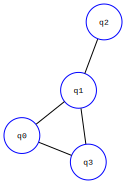

In [100]:
c3.draw_qubit_dependency()

In [123]:
import networkx as nx
import numpy as np
from sklearn.metrics.pairwise import rbf_kernel

def shortest_path_kernel(G1, G2, sigma=1.0):
    """
    计算两个图之间的 Shortest Path Kernel 相似性。
    
    参数：
    - G1, G2: NetworkX 图
    - sigma: RBF 核的参数，控制分布的平滑程度
    
    返回值：
    - kernel: 两个图的相似性分数
    """
    # Step 1: 计算最短路径分布
    def compute_shortest_path_histogram(G):
        # 计算图中每对节点的最短路径长度
        sp_lengths = dict(nx.all_pairs_shortest_path_length(G))
        lengths = []
        for source, targets in sp_lengths.items():
            lengths.extend(targets.values())
        # 转换为分布（频率）
        max_length = max(lengths) if lengths else 1
        histogram = np.zeros(max_length + 1)
        for l in lengths:
            histogram[l] += 1
        return histogram

    # 获取两个图的最短路径分布
    hist1 = compute_shortest_path_histogram(G1)
    hist2 = compute_shortest_path_histogram(G2)
    
    # Step 2: 使用 RBF 核比较分布
    hist1 = hist1.reshape(1, -1)
    hist2 = hist2.reshape(1, -1)
    kernel_matrix = rbf_kernel(hist1, hist2, gamma=1 / (2 * sigma ** 2))
    
    return kernel_matrix[0, 0]

# 示例图
G1 = nx.cycle_graph(5)  # 环图
G2 = nx.path_graph(5)   # 路径图

# 计算 Shortest Path Kernel
similarity = shortest_path_kernel(G1, G2, sigma=1.0)
print(f"Shortest Path Kernel 相似性: {similarity}")


ModuleNotFoundError: No module named 'sklearn'